# Preprocessing data

Tahap pertama penyetinggan API, Libraries, Dataset

In [ ]:
# Block 1: Install Kaggle API dan Download Dataset

# Install Kaggle API
!pip install -q kaggle

# Import library yang diperlukan
from sklearn.model_selection import train_test_split
from google.colab import files

# Unggah file kaggle.json dari komputer Anda
files.upload()

# Pindahkan file kaggle.json ke direktori yang benar
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verifikasi Kaggle API
!kaggle datasets list

# Download dataset dengan nama yang benar
!kaggle datasets download -d allandclive/chicken-disease-1 --force

# Unzip dataset ke dalam folder /content/dataset
!unzip -o chicken-disease-1.zip -d /content/dataset

# List file di dalam folder /content/dataset
!ls /content/dataset

# Opsional: Simpan dataset ke Google Drive untuk penggunaan di sesi berikutnya
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

# Salin dataset ke Google Drive untuk backup
!cp -r /content/dataset /content/drive/MyDrive/dataset/


melihat isi folder

In [ ]:
# Block 2: List file dari folder Train
!ls /content/dataset/Train/


 cocci.0.jpg	  cocci.561.jpg      healthy.2012.jpg	   pcrcocci.3.jpg       salmo.15.jpg
 cocci.1000.jpg   cocci.562.jpg      healthy.2013.jpg	   pcrcocci.40.jpg      salmo.1600.jpg
 cocci.1001.jpg   cocci.563.jpg      healthy.2014.jpg	   pcrcocci.41.jpg      salmo.1601.jpg
 cocci.1002.jpg   cocci.564.jpg      healthy.2015.jpg	   pcrcocci.42.jpg      salmo.1602.jpg
 cocci.1003.jpg   cocci.565.jpg      healthy.2016.jpg	   pcrcocci.43.jpg      salmo.1603.jpg
 cocci.1004.jpg   cocci.566.jpg      healthy.2017.jpg	   pcrcocci.44.jpg      salmo.1604.jpg
 cocci.1005.jpg   cocci.567.jpg      healthy.2018.jpg	   pcrcocci.45.jpg      salmo.1605.jpg
 cocci.1006.jpg   cocci.568.jpg      healthy.2019.jpg	   pcrcocci.46.jpg      salmo.1606.jpg
 cocci.1007.jpg   cocci.569.jpg      healthy.201.jpg	   pcrcocci.47.jpg      salmo.1607.jpg
 cocci.1008.jpg   cocci.56.jpg	     healthy.2020.jpg	   pcrcocci.48.jpg      salmo.1608.jpg
 cocci.1009.jpg   cocci.570.jpg      healthy.2021.jpg	   pcrcocci.49.jpg     

install TensorFlow

In [ ]:
# Block 4: Install TensorFlow versi stabil
!pip install tensorflow==2.11.0 protobuf


In [ ]:
import tensorflow as tf
print(tf.__version__)  # Memeriksa versi TensorFlow yang diinstal


2.11.0


buat folder label kelas

In [ ]:
import os

# Direktori dataset
train_dir = '/content/dataset/Train'

# Nama kelas berdasarkan pola nama file
class_names = {
    'cocci': 'Coccidiosis',
    'pcrcocci': 'Coccidiosis',
    'healthy': 'Healthy',
    'pcrhealthy': 'Healthy',
    'ncd': 'New Castle Disease',
    'pcrncd': 'New Castle Disease',
    'salmo': 'Salmonella',
    'pcrsalmo': 'Salmonella'
}

# Buat folder untuk setiap kelas
for class_name in set(class_names.values()):  # Menggunakan set untuk menghindari duplikat
    class_folder = os.path.join(train_dir, class_name)
    os.makedirs(class_folder, exist_ok=True)  # Membuat folder jika belum ada
    print(f"Folder {class_name} dibuat")


Folder New Castle Disease dibuat
Folder Salmonella dibuat
Folder Coccidiosis dibuat
Folder Healthy dibuat


pindahkan file data sesuai label kelas

In [ ]:
import os
import shutil

# Direktori dataset
train_dir = '/content/dataset/Train'

# Nama kelas berdasarkan pola nama file
class_names = {
    'cocci': 'Coccidiosis',
    'pcrcocci': 'Coccidiosis',
    'healthy': 'Healthy',
    'pcrhealthy': 'Healthy',
    'ncd': 'New Castle Disease',
    'pcrncd': 'New Castle Disease',
    'salmo': 'Salmonella',
    'pcrsalmo': 'Salmonella'
}

# Pindahkan gambar ke folder yang sesuai
for img_file in os.listdir(train_dir):
    img_path = os.path.join(train_dir, img_file)
    if os.path.isfile(img_path):  # Cek apakah itu file
        for prefix, class_name in class_names.items():
            if img_file.startswith(prefix):  # Cek apakah nama file cocok dengan kelas
                class_folder = os.path.join(train_dir, class_name)

                # Siapkan jalur file tujuan
                dest_path = os.path.join(class_folder, img_file)

                # Cek apakah file sudah ada di folder tujuan
                if os.path.exists(dest_path):
                    # Ambil nama file tanpa ekstensi dan ekstensi
                    base_name, ext = os.path.splitext(img_file)
                    counter = 1
                    # Buat nama file baru jika sudah ada
                    while os.path.exists(dest_path):
                        dest_path = os.path.join(class_folder, f"{base_name}_{counter}{ext}")
                        counter += 1

                shutil.move(img_path, dest_path)  # Memindahkan file
                print(f"{img_file} dipindahkan ke folder {class_name}")
                break


Streaming output truncated to the last 5000 lines.
cocci.1502.jpg dipindahkan ke folder Coccidiosis
salmo.1870.jpg dipindahkan ke folder Salmonella
healthy.1779.jpg dipindahkan ke folder Healthy
pcrcocci.82.jpg dipindahkan ke folder Coccidiosis
cocci.621.jpg dipindahkan ke folder Coccidiosis
pcrsalmo.145.jpg dipindahkan ke folder Salmonella
pcrsalmo.210.jpg dipindahkan ke folder Salmonella
salmo.607.jpg dipindahkan ke folder Salmonella
cocci.556.jpg dipindahkan ke folder Coccidiosis
salmo.1839.jpg dipindahkan ke folder Salmonella
pcrcocci.351.jpg dipindahkan ke folder Coccidiosis
pcrsalmo.18.jpg dipindahkan ke folder Salmonella
pcrhealthy.252.jpg dipindahkan ke folder Healthy
cocci.224.jpg dipindahkan ke folder Coccidiosis
healthy.1291.jpg dipindahkan ke folder Healthy
salmo.44.jpg dipindahkan ke folder Salmonella
healthy.919.jpg dipindahkan ke folder Healthy
cocci.195.jpg dipindahkan ke folder Coccidiosis
healthy.531.jpg dipindahkan ke folder Healthy
cocci.250.jpg dipindahkan ke folde

cek hasil struktur folder kelas beserta jumlah gambarnya

In [ ]:
import os

# Direktori dataset
train_dir = '/content/dataset/Train'

# Cek kelas di dalam folder Train
classes = os.listdir(train_dir)

# Menampilkan jumlah gambar di setiap kelas
for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        print(f"Kelas {class_name}: {len(images)} gambar")


Kelas New Castle Disease: 562 gambar
Kelas Salmonella: 2625 gambar
Kelas Coccidiosis: 2476 gambar
Kelas Healthy: 2404 gambar


Pembagian data untuk train dan validation

In [ ]:
# Block 3: Split Dataset ke Train dan Validation
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the main dataset directory
dataset_dir = '/content/dataset/Train'  # Sesuaikan dengan folder dataset yang diunzip

# Define directories for training and validation sets
train_dir = '/content/dataset_split/train'
val_dir = '/content/dataset_split/val'

# Buat folder train dan val jika belum ada
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop untuk setiap kelas di dalam dataset (misal 'normal', 'disease')
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)

    if os.path.isdir(class_path):  # Pastikan ini adalah folder kelas
        images = os.listdir(class_path)  # List semua gambar di folder kelas
        images = [f for f in images if os.path.isfile(os.path.join(class_path, f))]  # Hanya file

        # Bagi data menjadi train dan validation (80:20 split)
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

        # Buat folder kelas di dalam train dan val
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        # Pindahkan gambar untuk training
        for img in train_images:
            shutil.move(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

        # Pindahkan gambar untuk validation
        for img in val_images:
            shutil.move(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))


cek hasilnya

In [ ]:
# Cek jumlah gambar di setiap folder train dan val setelah dipindahkan
for class_name in os.listdir(train_dir):
    train_class_path = os.path.join(train_dir, class_name)
    val_class_path = os.path.join(val_dir, class_name)

    train_images = os.listdir(train_class_path)
    val_images = os.listdir(val_class_path)

    print(f"Kelas {class_name}:")
    print(f"  - {len(train_images)} gambar di folder train")
    print(f"  - {len(val_images)} gambar di folder val")


Kelas New Castle Disease:
  - 449 gambar di folder train
  - 113 gambar di folder val
Kelas Salmonella:
  - 2100 gambar di folder train
  - 525 gambar di folder val
Kelas Coccidiosis:
  - 1980 gambar di folder train
  - 496 gambar di folder val
Kelas Healthy:
  - 1923 gambar di folder train
  - 481 gambar di folder val


In [ ]:
# Install pandas if not already installed
!pip install pandas

# Import pandas library
import pandas as pd

# Membaca file CSV
csv_path = '/content/dataset/train_data.csv'
df = pd.read_csv(csv_path)

# Menampilkan beberapa baris pertama
print(df.head())


           images               label
0  salmo.1558.jpg          Salmonella
1  cocci.1866.jpg         Coccidiosis
2   cocci.171.jpg         Coccidiosis
3  salmo.1484.jpg          Salmonella
4     ncd.100.jpg  New Castle Disease


cek dan data cleaning

In [ ]:
# Memeriksa data missing
print("Data Missing:")
print(df.isnull().sum())  # Menampilkan jumlah nilai yang hilang per kolom

# Memeriksa apakah ada duplikat
duplicates = df.duplicated().sum()
print(f"\nJumlah duplikat: {duplicates}")

# Menghapus duplikat jika ada
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplikat telah dihapus.")

# Menghapus baris dengan nilai yang hilang (jika ada)
df = df.dropna()  # Hapus baris dengan nilai yang hilang

# Menampilkan informasi DataFrame setelah cleaning
print("\nInformasi DataFrame setelah cleaning:")
print(df.info())


Data Missing:
images    0
label     0
dtype: int64

Jumlah duplikat: 0

Informasi DataFrame setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8067 entries, 0 to 8066
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  8067 non-null   object
 1   label   8067 non-null   object
dtypes: object(2)
memory usage: 126.2+ KB
None


Tahap augmentasi data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generator untuk augmentasi pada training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Hanya rescaling untuk validation (tidak ada augmentasi)
val_datagen = ImageDataGenerator(rescale=1./255)

# Path ke direktori train dan validation
train_dir = '/content/dataset_split/train'
val_dir = '/content/dataset_split/val'

# Load dan augment data pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Ukuran gambar sesuai yang diharapkan model CNN
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

# Load data validasi (tanpa augmentasi)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 6452 images belonging to 4 classes.
Found 1615 images belonging to 4 classes.


cek hasil augmentasi

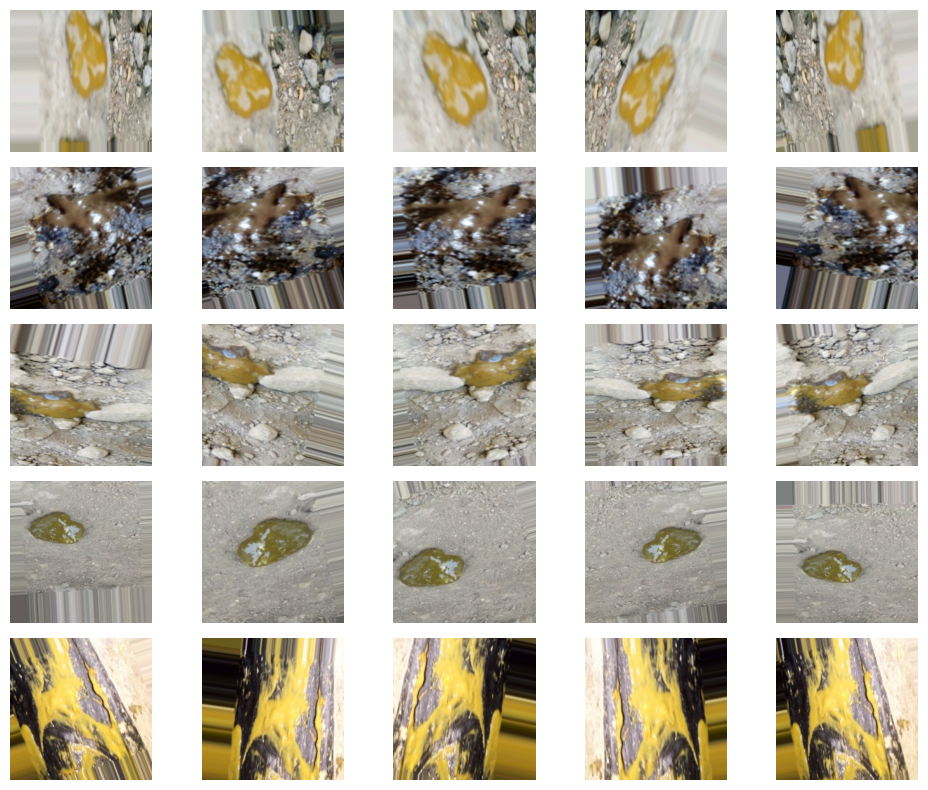

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke direktori train
train_dir = '/content/dataset_split/train'
class_names = ['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']

# Buat instance ImageDataGenerator untuk augmentasi
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Ambil beberapa gambar dari kelas pertama untuk contoh
class_path = os.path.join(train_dir, class_names[0])
images = os.listdir(class_path)[:5]  # Ambil 5 gambar pertama

plt.figure(figsize=(10, 8))

for i, img_name in enumerate(images):
    img_path = os.path.join(class_path, img_name)
    img = mpimg.imread(img_path)
    img = img.reshape((1,) + img.shape)  # Ubah bentuk untuk augmentasi

    # Augmentasi dan tampilkan hasilnya
    for j in range(5):  # Ambil 5 contoh augmentasi
        augmented_images = datagen.flow(img)  # Augmentasi
        aug_img = next(augmented_images)[0]  # Ambil gambar yang diaugmentasi
        plt.subplot(5, 5, i * 5 + j + 1)
        plt.imshow(aug_img)
        plt.axis('off')

plt.tight_layout()
plt.show()


Setelah tahap ini, langkah selanjutnya adalah membangun dan melatih model

##Tahap Visualisasi data

Visualisasi Distribusi Data

<ipython-input-28-64d674a0ffcc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


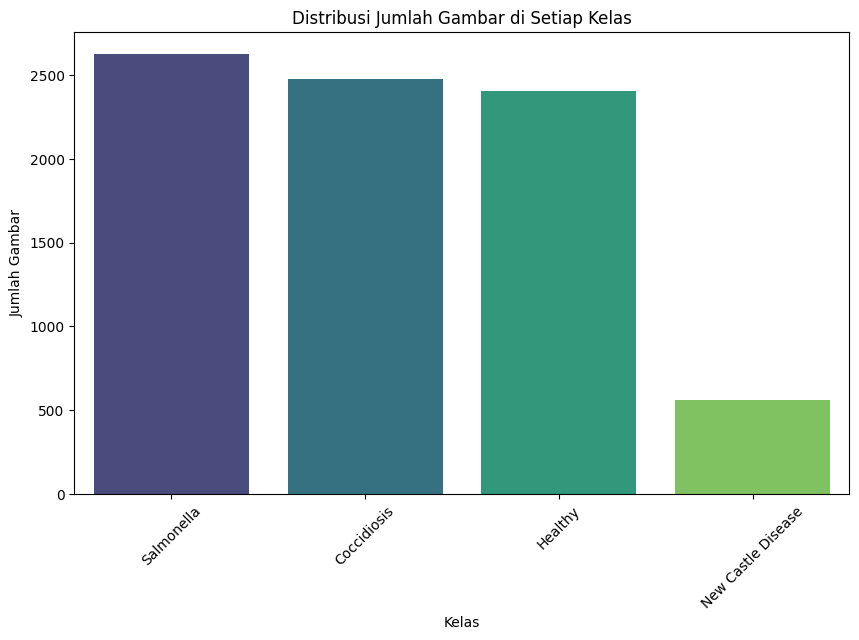

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca file CSV
csv_path = '/content/dataset/train_data.csv'
df = pd.read_csv(csv_path)

# Menghitung jumlah gambar di setiap kelas
class_counts = df['label'].value_counts()

# Visualisasi distribusi data
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribusi Jumlah Gambar di Setiap Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.show()


Visualisasi Contoh Gambar dari Setiap Kelas

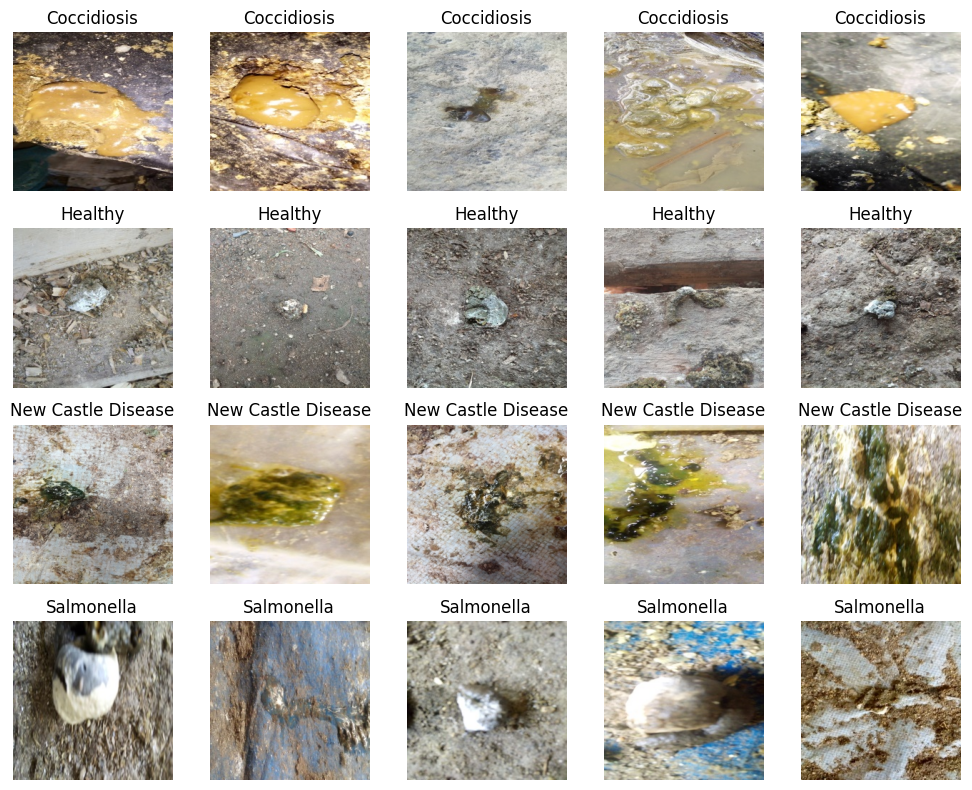

In [ ]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Definisikan nama kelas
class_names = ['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']
train_dir = '/content/dataset_split/train'

plt.figure(figsize=(10, 8))

# Tampilkan 5 gambar dari setiap kelas
for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)

    # Pastikan folder kelas ada
    if os.path.isdir(class_path):
        images = os.listdir(class_path)[:5]  # Ambil 5 gambar pertama

        for j, img_name in enumerate(images):
            img_path = os.path.join(class_path, img_name)
            img = mpimg.imread(img_path)
            plt.subplot(len(class_names), 5, i * 5 + j + 1)
            plt.imshow(img)
            plt.axis('off')  # Nonaktifkan sumbu
            plt.title(class_name)

plt.tight_layout()
plt.show()  # Pastikan untuk menampilkan plot


# Pemodelan CNN

Pemodelan CNN menggunakan arsitektur InceptionV3

In [ ]:
# Import library yang dibutuhkan
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

#load pre-trained INceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Tambah lapisan classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x) # 4 adalah jumlah kelas Anda

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze lapisan InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train Model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_data = val_generator,
    validation_steps = val_generator.samples // val_generator.batch_size,
    epochs = 10) # Epoch menyesuaikan

Epoch 1/10
201/201 [==============================] - 701s 3s/step - loss: 0.6332 - accuracy: 0.7930 - val_loss: 0.3832 - val_accuracy: 0.8712
Epoch 2/10
201/201 [==============================] - 701s 3s/step - loss: 0.3525 - accuracy: 0.8717 - val_loss: 0.3333 - val_accuracy: 0.8825
Epoch 3/10
 56/201 [=======>......................] - ETA: 6:55 - loss: 0.3180 - accuracy: 0.8884

Evaluasi model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Prediksi pada data validasi
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Dapatkan label sebenarnya dari data validasi
y_true = val_generator.classes

# Tampilkan classification report
print('Classification Report')
target_names = list(train_generator.class_indices.keys())  # Nama-nama kelas
print(classification_report(y_true, y_pred, target_names=target_names))

# Tampilkan confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

NameError: name 'val_generator' is not defined

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)

51/51 [==============================] - 208s 4s/step - loss: 0.2497 - accuracy: 0.9133
Validation Loss: 0.24965882301330566
Validation Accuracy: 0.9133126735687256


# Hyperparameter tuning

In [ ]:
!pip install -q -U keras-tuner

import keras_tuner as kt

def build_model(hp):
  """Membangun model dengan learning rate yang dapat di-tuning."""

  # Load pre-trained INceptionV3 model
  base_model = InceptionV3(weights='imagenet', include_top=False)

  # Tambah lapisan classifier
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024, activation='relu')(x)
  predictions = Dense(4, activation='softmax')(x) # 4 adalah jumlah kelas Anda

  model = Model(inputs=base_model.input, outputs=predictions)

  # Freeze lapisan InceptionV3
  for layer in base_model.layers:
      layer.trainable = False

  # Tuning learning rate
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  # Compile Model
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

# Inisialisasi tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Mencari hyperparameter terbaik
tuner.search(train_generator,
             steps_per_epoch = train_generator.samples // train_generator.batch_size,
             validation_data = val_generator,
             validation_steps = val_generator.samples // val_generator.batch_size,
             epochs = 10)

# Mendapatkan model terbaik
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

Trial 3 Complete [00h 38m 13s]
val_accuracy: 0.8768749833106995

Best val_accuracy So Far: 0.8768749833106995
Total elapsed time: 01h 56m 26s


Penyimpanan model

In [ ]:
model.save('model_diagnosis_penyakit_ayam.h5')

Arsitektur model InceptionV3

In [ ]:
!pip install pydot graphviz

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
!pip install keras

In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_inceptionv3.png', show_shapes=True, show_layer_names=True)

# Pemodelan gabungan


In [ ]:
# Import Libraries dan Load Model Pre-trained
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, concatenate
from tensorflow.keras.models import Model

# Model InceptionV3
input_tensor = Input(shape=(224, 224, 3))  # Sesuaikan dengan input Anda

# Load InceptionV3 tanpa lapisan klasifikasi teratas
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Tambahkan GlobalAveragePooling dan Dense layer
x_inception = base_model_inception.output
x_inception = GlobalAveragePooling2D()(x_inception)
x_inception = Dense(1024, activation='relu')(x_inception)

# Model ResNet50
# Load ResNet50 tanpa lapisan klasifikasi teratas
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Tambahkan GlobalAveragePooling dan Dense layer
x_resnet = base_model_resnet.output
x_resnet = GlobalAveragePooling2D()(x_resnet)
x_resnet = Dense(1024, activation='relu')(x_resnet)

# Gabungkan output dari kedua model
merged = concatenate([x_inception, x_resnet])

# Tambahkan lapisan output akhir
predictions = Dense(4, activation='softmax')(merged)  # 4 adalah jumlah kelas

# Buat model ensemble
ensemble_model = Model(inputs=input_tensor, outputs=predictions)

# Freeze lapisan-lapisan yang sudah dilatih sebelumnya
for layer in base_model_inception.layers:
    layer.trainable = False

for layer in base_model_resnet.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 3s 0us/step
